In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap

plt.style.use('seaborn-white')

/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_9451/1166498609.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


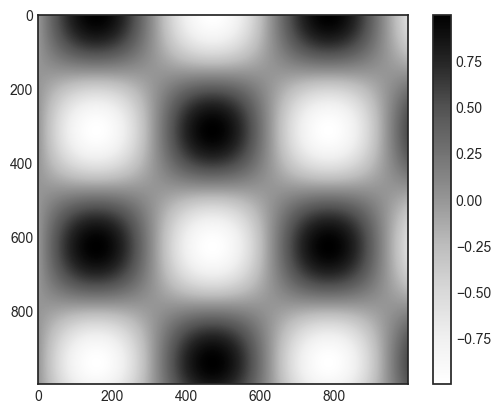

In [3]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

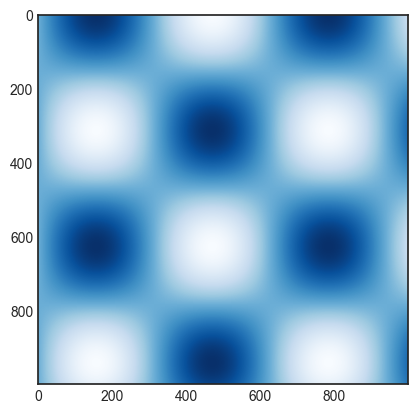

In [4]:
# the colormap can be specified with the cmap argument to the plotting function
plt.imshow(I, cmap="Blues")

In [5]:
# choosing the colormap
# there are three different categories of colormaps:
# sequential colormaps, which are made up of one continuous sequence of colors
# divergent colormaps, which have two distinct colors at two ends of the spectrum
# qualitative colormaps, which mix colors with no particular sequence
# jet is default colormap in matplotlib
def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    # Convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]

    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)


def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_9451/775481734.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_9451/775481734.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


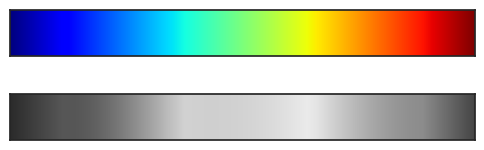

In [6]:
view_colormap("jet")

/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_9451/775481734.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_9451/775481734.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


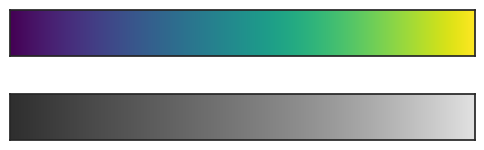

In [7]:
# the bright stripes in the grayscale image give a false sense of where the data is dense and where it is sparse it is better to use a color map such as viridis which is specifically constructed to have even brightness across the range thus it not only plays well with our color perception but also will translate well to grayscale printing
view_colormap("viridis")

/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_9451/775481734.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_9451/775481734.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


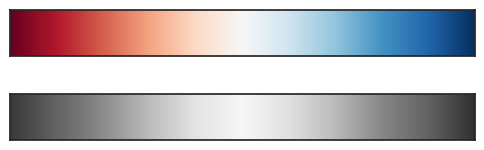

In [8]:
# for positive and negative deviations from some mean dual color maps are useful such as RdBu or PuOr
# but this may be lost in grayscale
view_colormap("RdBu")

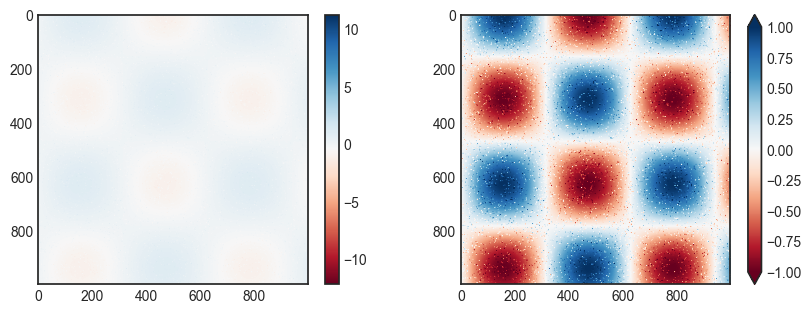

In [9]:
# color limits and extensions
# the colorbar has some flexibility. we can norrow the color limits and indicate the out-of-bounds values with a triangle at the top or bottom by setting the extend property. this might be useful when an image is noisy
# make noise in 1% of the image pixels
speckles = np.random.random(I.shape) < 0.01
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap="RdBu")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap="RdBu")
plt.colorbar(extend="both")
plt.clim(-1, 1)
# the left panel shows the default color limits respond to the noisy pixels and the range of the noise completely washes out the pattern in the right panel we set the color limits and add extentions to indicate values that are above or below those limits

/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_9451/2728889777.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))


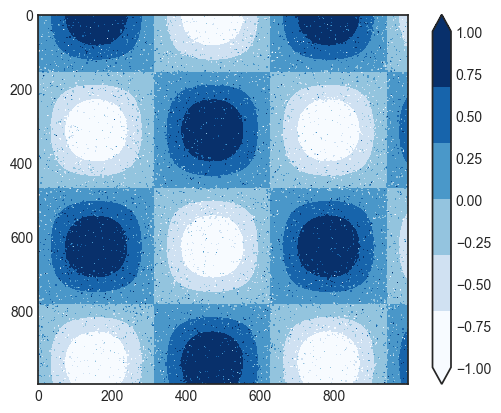

In [10]:
# discrete color bars
# colormaps are by default continous sometimes it is better to use a discrete colormap we can use plt.cm.get_cmap() to construct a colormap from a list of colors and number of bins
plt.imshow(I, cmap=plt.cm.get_cmap("Blues", 6))
plt.colorbar(extend="both")
plt.clim(-1, 1)

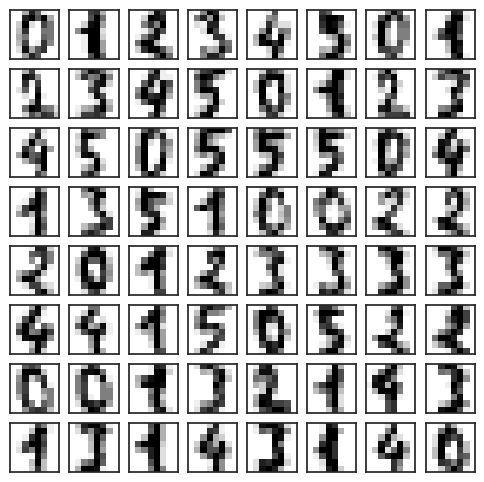

In [11]:
# example: hand written digits
# as an example of where this can be applied let us look at an interesting visualization of some hand written digits data
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap="binary")
    axi.set(xticks=[], yticks=[])